# Import Dataset and EDA

Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv('beans-230421-141141.csv')

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,NaN,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
data.shape

(13611, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  12577 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       12808 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      12223 non-null  float64
 12  ShapeFactor1     13080 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     12563 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
data.isnull().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64

In [7]:
data['MinorAxisLength'] = data['MinorAxisLength'].fillna(value = data['MinorAxisLength'].mean())

In [8]:
data['ConvexArea'] = data['ConvexArea'].fillna(value = data['ConvexArea'].mean())
data['Compactness'] = data['Compactness'].fillna(value = data['Compactness'].mean())
data['ShapeFactor1'] = data['ShapeFactor1'].fillna(value = data['ShapeFactor1'].mean())
data['ShapeFactor4'] = data['ShapeFactor4'].fillna(value = data['ShapeFactor4'].mean())

In [9]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [10]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.799551,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


From this data overview we can see that:

The dataset has 13611 rows and 17 columns.

All columns are numerical except "Class" column which will be our target.

Null Values are imputed by the mean.

By looking at the description of the data we can come to the conclusion that our data will need standardization.

# Target Info

In [11]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [12]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

There is 7 unique types of beans in "Class" Column.

BOMBAY occurs the least amount of times in dataset.

DERMASON most often appears in our dataset.

# Class Column Visualization

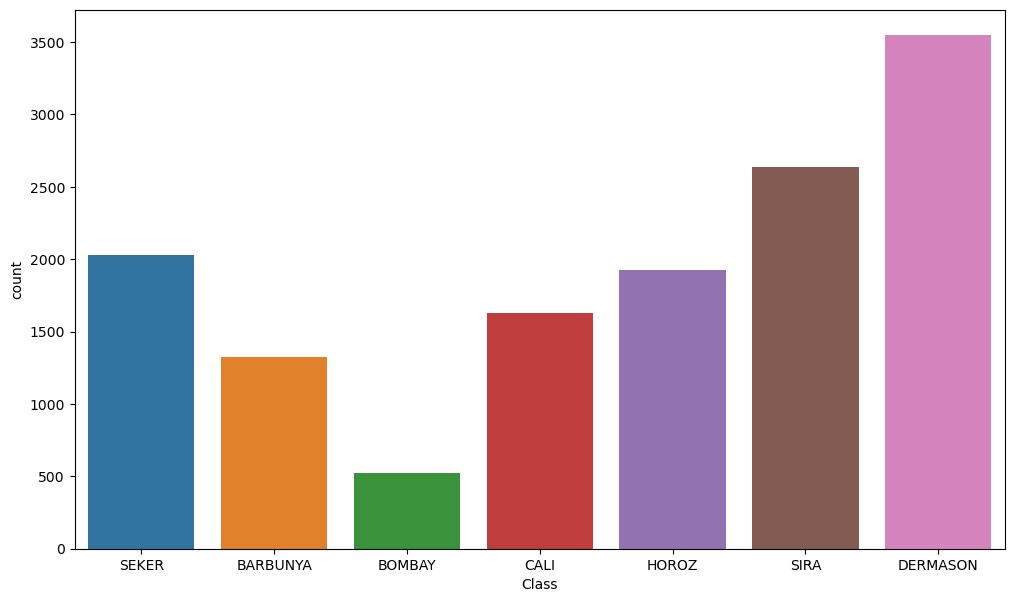

In [13]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=data)
plt.show()

Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

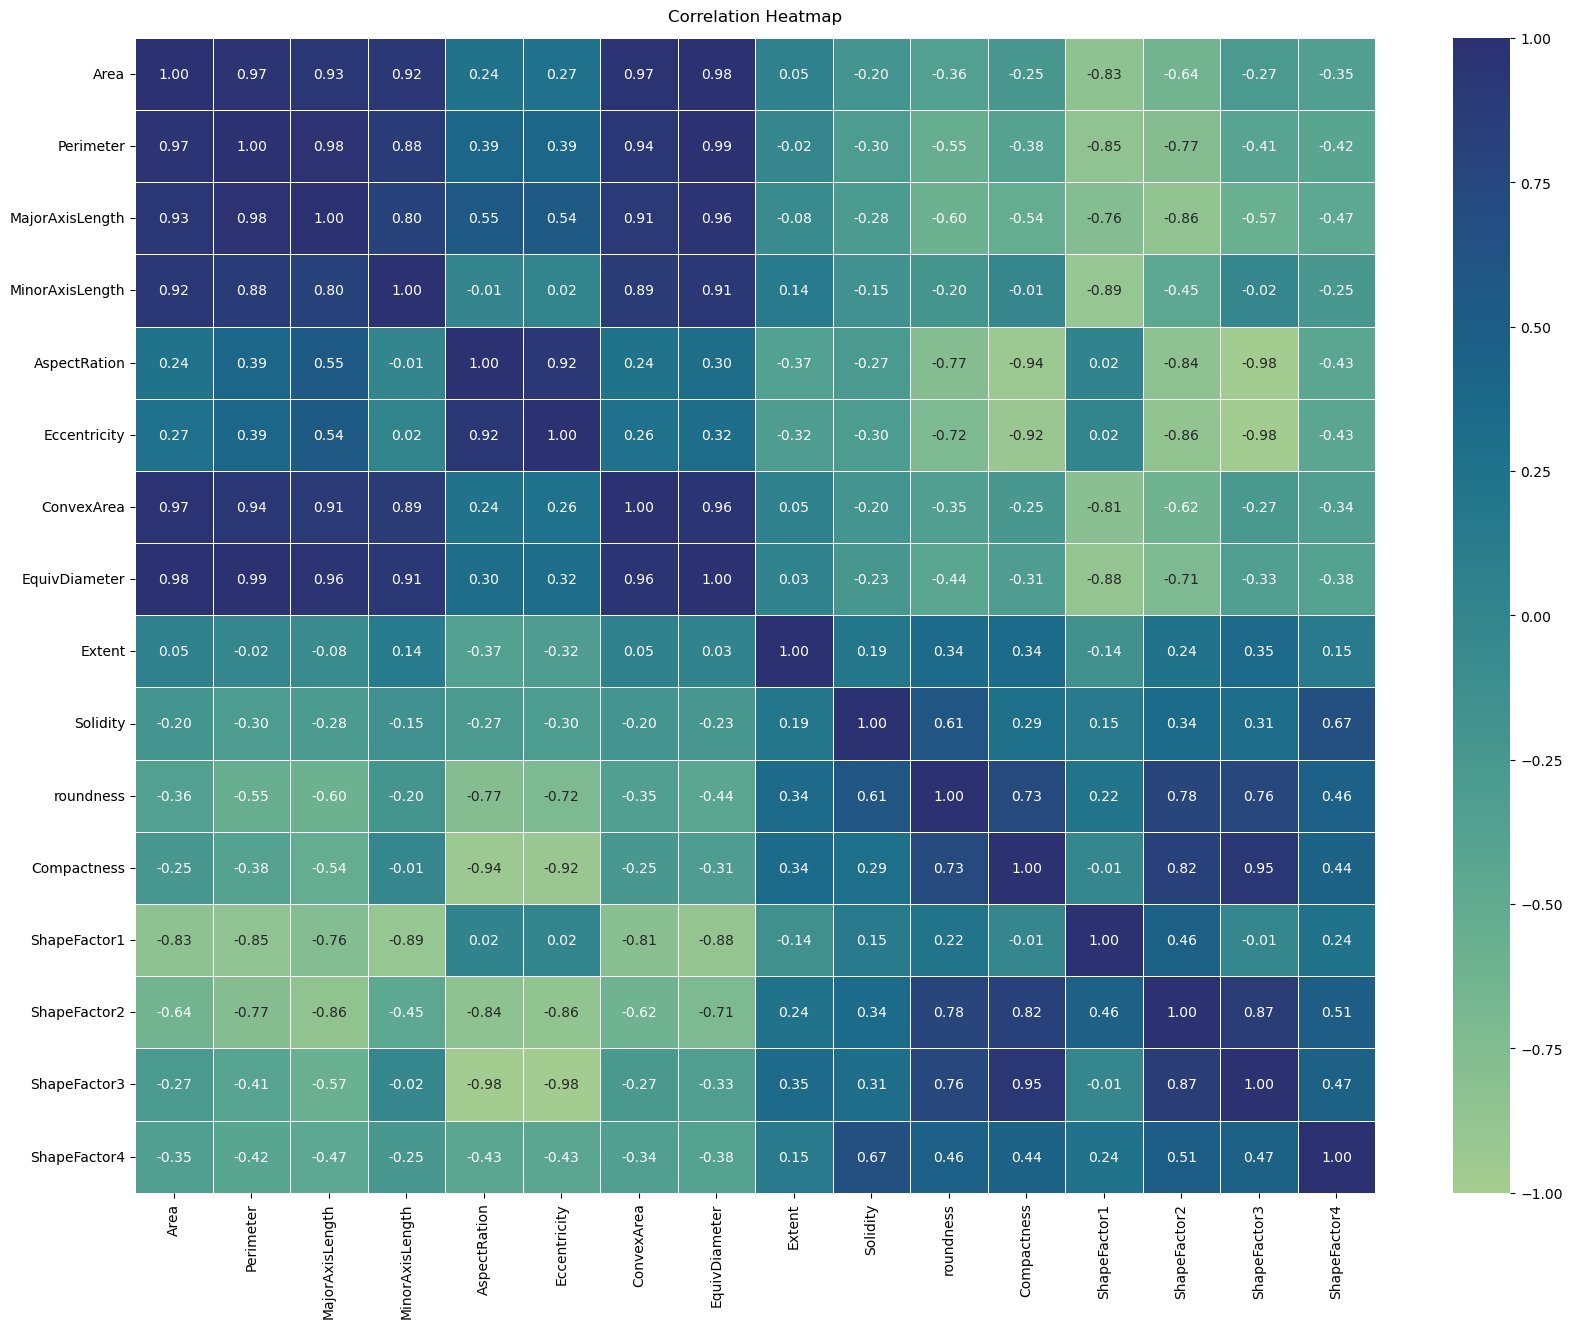

In [14]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# The following correlations were noted:

Area: Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter.

Perimeter: Area, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter.

MajorAxisLength: Area, Perimeter, MinorAxisLength, ConvexArea, EquivDiameter.

MinorAxisLength: Area, Perimeter, MajorAxisLength, ConvexArea, EquivDiameter.

ConvexArea: Area, Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter.

EquivDiameter: Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea.

# Attributes Histogram

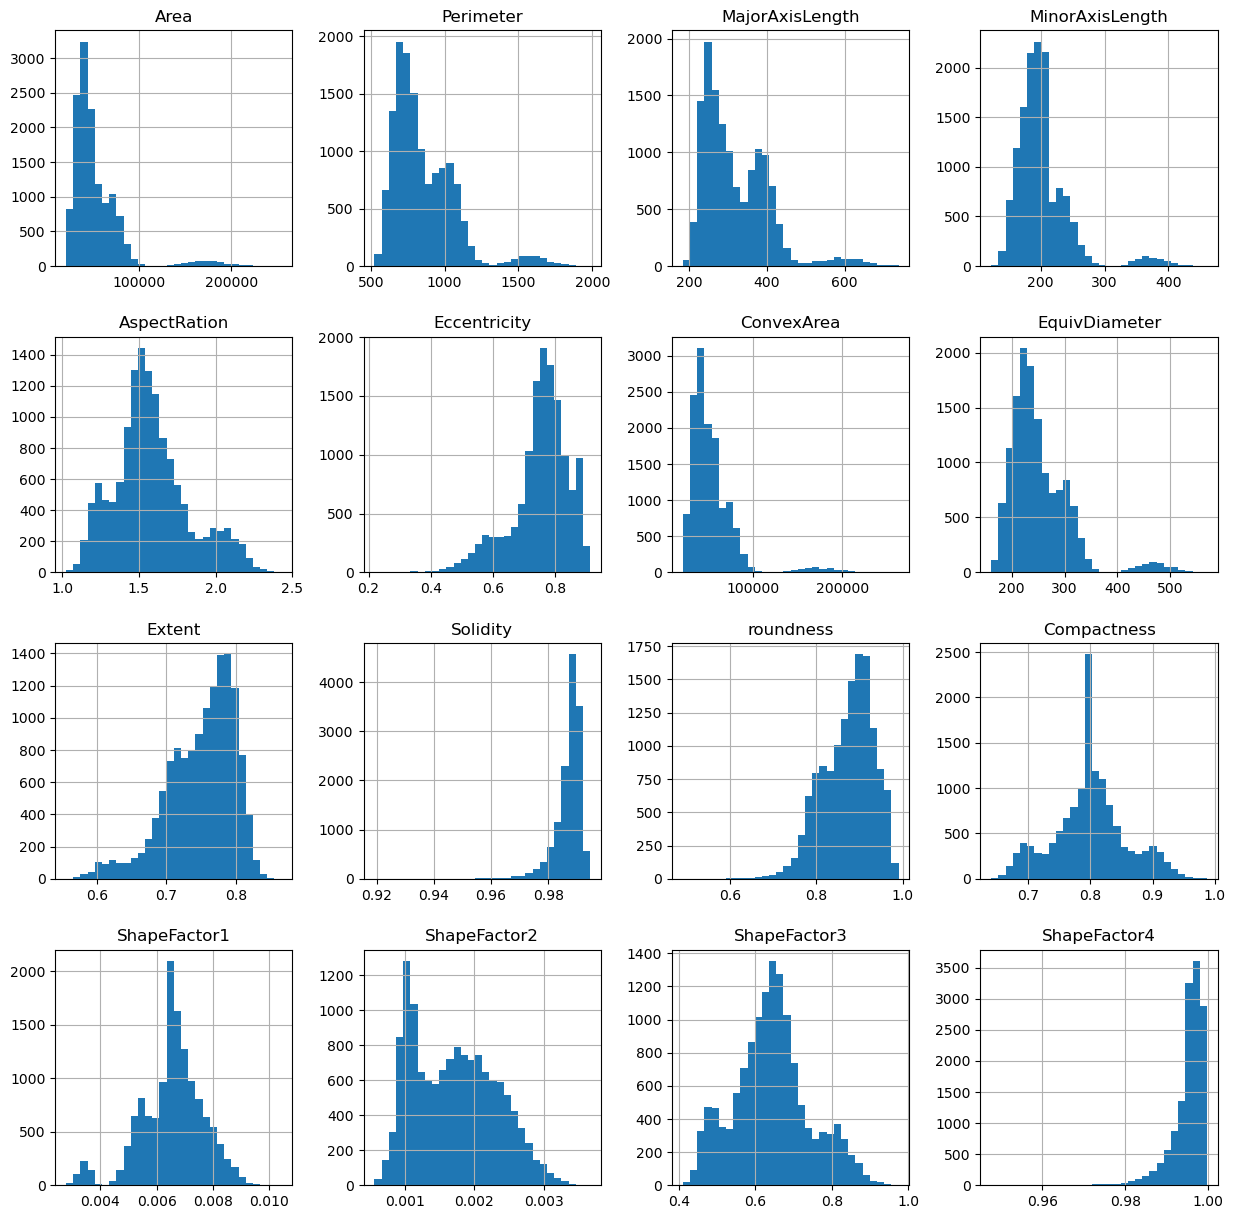

In [15]:
data.hist(bins=30, figsize=(15,15))
plt.show()

# Feature Engineering

Label Encoding

"Class" column is str so we need to convert the labels into a numeric form.

In [16]:
labelencoder = LabelEncoder()
data["Class"] = labelencoder.fit_transform(data['Class'])

data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.799551,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


Splitting Data Into Train and Test Subsets

In [17]:
X = data.drop(columns='Class')
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Calculating Feature Importance

[0.06749898 0.07706074 0.07265903 0.05950059 0.08020164 0.07347678
 0.06096219 0.07408536 0.01489455 0.01831224 0.06603008 0.06012236
 0.08277063 0.07417871 0.09242713 0.02581899]


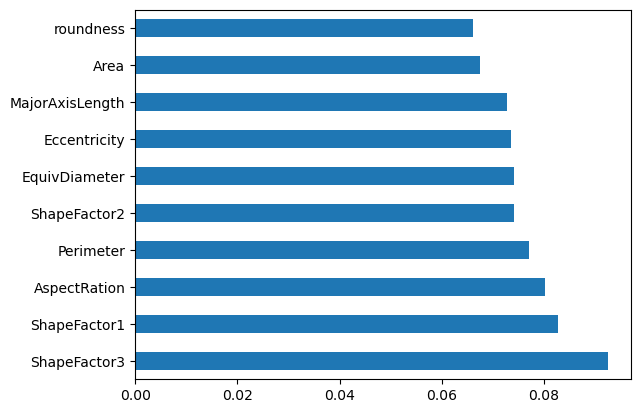

In [18]:
model = ExtraTreesClassifier(n_estimators=500, random_state=42)
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Standarizing Features

In [19]:
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Model Training

For classification purposes, I chose the: Random Forest Classifier Model

In [20]:
forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)

forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)

Accuracy Score

In [21]:
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91333


Classification Visualization Using ConfusionMatrixDisplay

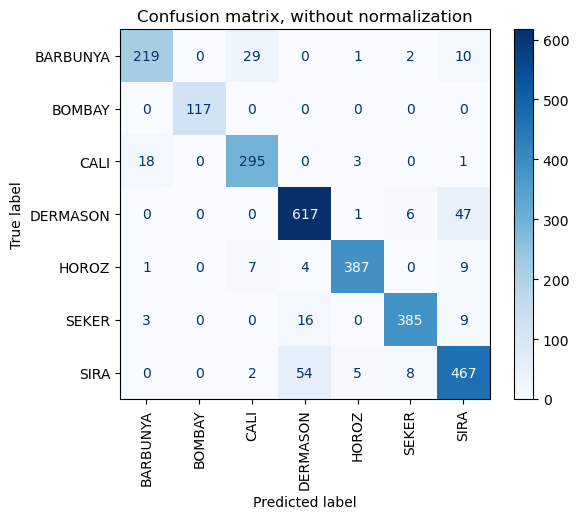

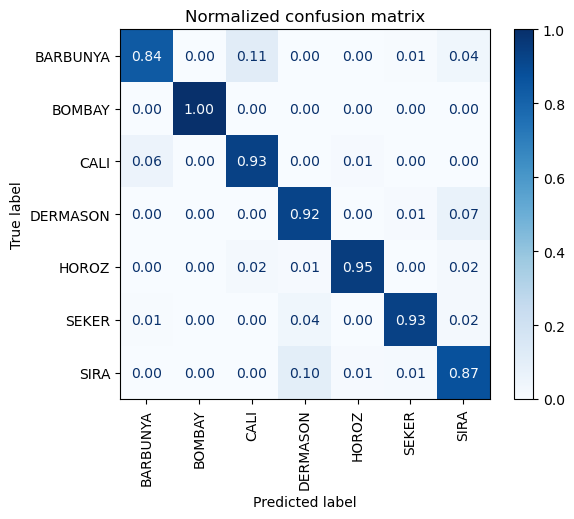

In [22]:
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        forest,
        X_test_scaled,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)
    
plt.show()

Classification Results:

Model Accuracy Score: 91.33%
    
Best Classification Result Obtained For Class: BOMBAY (1.00)
    
Model Achieved Good Results For Most Common Class: DERMASON (0.92)
    
Worst Result Was Obtained For Class: BARBUNYA (0.84) Most Often Confused With CALI

# Model Tuning

In order to improve the performance of the model I searched for better parameters.

Parameters Grid and RandomizedSearchCV

In [23]:
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_features': [2, 4, 5, 6],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_depth': [5, 8, 10]
}

In [24]:
clf = RandomizedSearchCV(forest, param_grid, scoring='accuracy', n_jobs=-1, random_state=42)
search = clf.fit(X_train_scaled, y_train)

Best Score of Search and Best Hyperparameters

In [25]:
print('Best Score: %s' % search.best_score_)
print('Best Hyperparameters: %s' % search.best_params_)

Best Score: 0.9184419043232257
Best Hyperparameters: {'n_estimators': 10, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 10}


Using New Parameters in RFC

In [26]:
forest_new_param = RandomForestClassifier(n_estimators=10,
                                          min_samples_leaf=1, 
                                          max_features=6, 
                                          max_depth=10, 
                                          random_state=42)
forest_new_param.fit(X_train_scaled, y_train)
y_pred_new_param = forest_new_param.predict(X_test_scaled)

New Classification Results

In [27]:
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred_new_param))

Accuracy: 0.91811


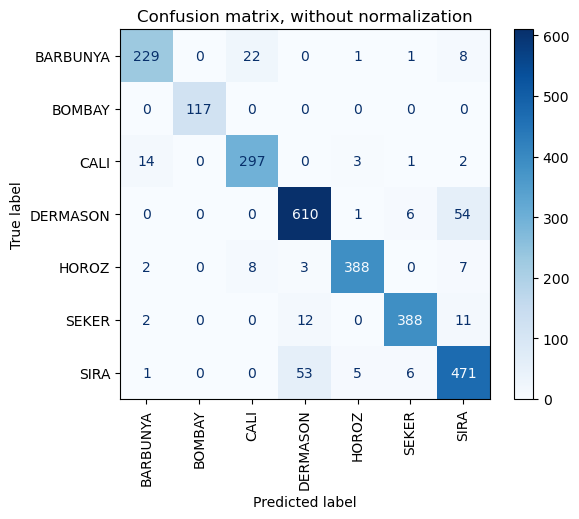

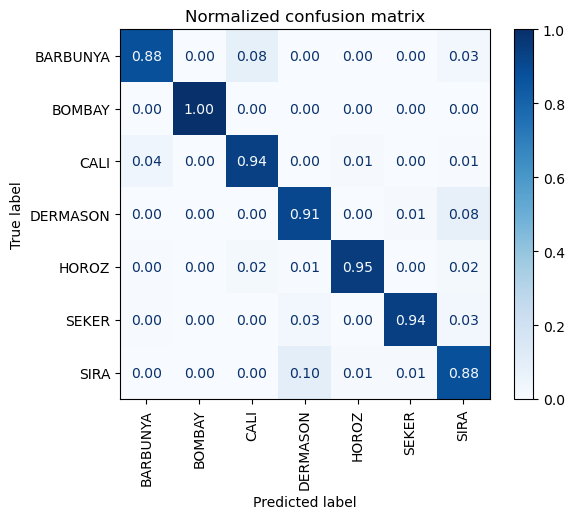

In [28]:
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        forest_new_param,
        X_test_scaled,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)
    
plt.show()

Conclusion of Model Tuning:

The Result Hasn't Been Improved as Much as Hoped

I successfully investigated the imported data and done exploratory data analysis. Key information was obtained which was useful for the rest of the task. Data visualization was performed and correlations were examined. In addition, Feature Engineering was performed. Random Forest Classification model obtained a satisfactory result at the level of 91%. Unfortunately, the results of the model could not be improved by RandomizedSearchCV.